In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

In [2]:
# Read Data

df = pd.read_csv("UWYieldDataNDVI.csv")
df['Moisture Content, w.b. %'] = df['Moisture Content, w.b. %'].str.rstrip('%').astype('float')
df = df.drop(df[df['Mean_NDVI']==0].index).drop(df[df['Yield, kg DM/ha']>=6500].index)
df = df.rename(columns={"Crop Height, m": "Height", "Moisture Content, w.b. %": "Moisture", "Yield, kg DM/ha":"Yield"})
df.head()

,Date,GCP,Northing,Easting,Elevation,Latitude DD.DD,Longitude DD.DD,Height,Yield,Moisture,Mean_NDVI,SD_NDVI
0,5/28/2019,T1,3077.3726,3061.3572,33.7142,43.3149,-89.3330,0.48,3930,84.4,0.280772,0.045344
1,5/28/2019,T2,3137.4370,3060.6171,32.8211,43.3155,-89.3330,0.47,3088,85.4,0.280200,0.064424
2,5/28/2019,T3,3078.2725,2982.3921,34.7905,43.3150,-89.3340,0.42,3578,82.6,0.276925,0.059429
3,5/28/2019,T4,3137.5043,2986.0653,33.2757,43.3155,-89.3339,0.41,3972,86.7,0.300764,0.056162
4,5/28/2019,T5,3106.5656,3029.7739,33.4311,43.3152,-89.3334,0.46,3494,85.6,0.266040,0.045340


Plotting the data

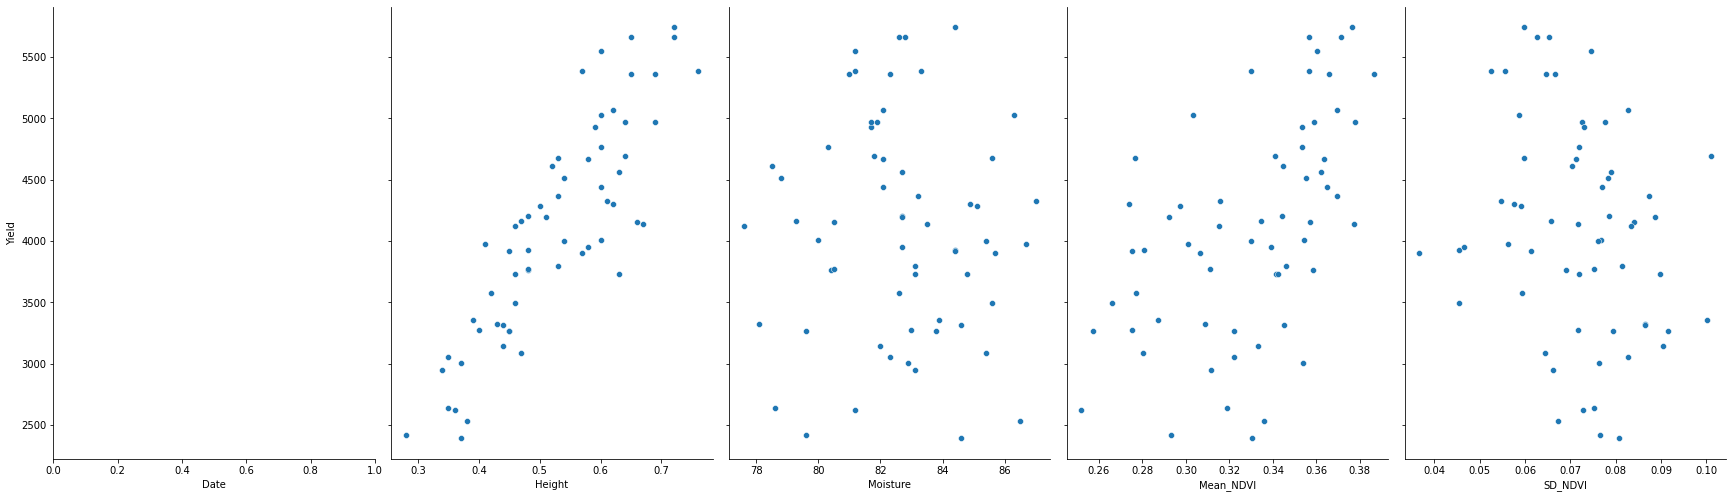

In [6]:
var_interest = ['Date','Height','Moisture','Mean_NDVI','SD_NDVI']
sns.pairplot(df, x_vars= var_interest, y_vars='Yield', height=7, aspect=0.7)

Plotting the data containing the 95% CI

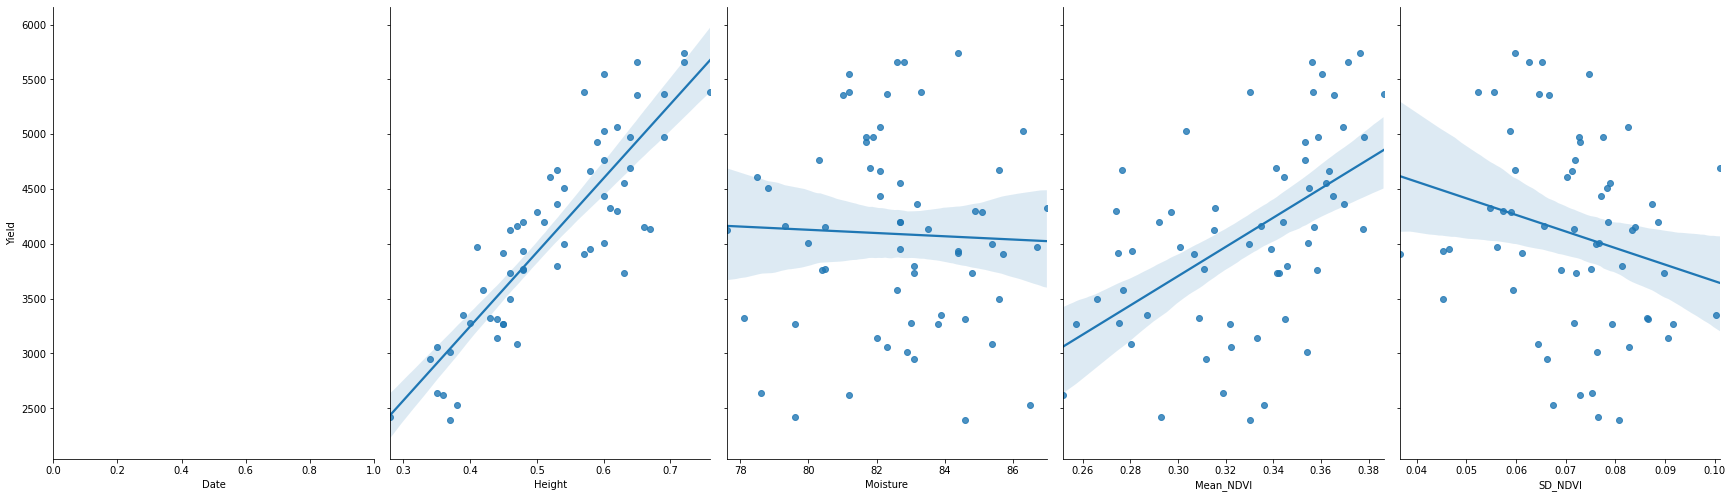

In [11]:
sns.pairplot(df, x_vars=var_interest, y_vars='Yield', height=7, aspect=0.7, kind='reg')

# Linear Model 1 (Mean NDVI + SD NDVI ~ Yield)
Creating linear regression with Mean and SD from NDVI

In [48]:
### STATSMODELS ###

# create a fitted model
lm1 = smf.ols(formula='Yield ~ Mean_NDVI + SD_NDVI', data=df).fit()

# print the coefficients
lm1.params

Intercept      785.631780
Mean_NDVI    14932.934971
SD_NDVI     -22463.650801
dtype: float64

In [49]:
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Yield   R-squared:                       0.397
Model:                            OLS   Adj. R-squared:                  0.376
Method:                 Least Squares   F-statistic:                     19.07
Date:                Mon, 12 Oct 2020   Prob (F-statistic):           4.32e-07
Time:                        14:55:53   Log-Likelihood:                -483.81
No. Observations:                  61   AIC:                             973.6
Df Residuals:                      58   BIC:                             979.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    785.6318    905.510      0.868      0.389   -1026.944    2598.208
Mean_NDVI   1.493e+04   2598.276      5.747      0.000    9731.920    2.01e+04
SD_NDVI    -2.246e+04   6817.983     -3.295      0.002   -3.61e+04   -8815.975
==============================================================================
Omnibus:                        2.107   Durbin-Watson:                   1.690
Prob(Omnibus):                  0.349   Jarque-Bera (JB):                2.028
Skew:                          -0.425   Prob(JB):                        0.363
Kurtosis:                       2.723   Cond. No.                         81.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Linear Model 2 (Height ~ Yield)

Creating model with only Height to predict Yield

In [50]:
# create a fitted model
lm2 = smf.ols(formula='Yield ~ Height', data=df).fit()

# print the coefficients
lm2.params

Intercept     545.381370
Height       6753.193891
dtype: float64

In [51]:
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Yield   R-squared:                       0.747
Model:                            OLS   Adj. R-squared:                  0.743
Method:                 Least Squares   F-statistic:                     174.2
Date:                Mon, 12 Oct 2020   Prob (F-statistic):           2.94e-19
Time:                        15:00:19   Log-Likelihood:                -457.30
No. Observations:                  61   AIC:                             918.6
Df Residuals:                      59   BIC:                             922.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    545.3814    274.439      1.987      0.052      -3.769    1094.532
Height      6753.1939    511.673     13.198      0.000    5729.338    7777.050
==============================================================================
Omnibus:                        0.207   Durbin-Watson:                   1.724
Prob(Omnibus):                  0.901   Jarque-Bera (JB):                0.284
Skew:                          -0.130   Prob(JB):                        0.867
Kurtosis:                       2.790   Cond. No.                         11.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Linear Model 3 (Height + Mean_NDVI + SD_NDVI ~ Yield)

Creating model with only Height to predict Yield

In [52]:
# create a fitted model
lm3 = smf.ols(formula='Yield ~ Height + Mean_NDVI + SD_NDVI', data=df).fit()

# print the coefficients
lm3.params

Intercept     606.177133
Height       6317.672549
Mean_NDVI    1662.761218
SD_NDVI     -5297.889296
dtype: float64

In [53]:
lm3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Yield   R-squared:                       0.753
Model:                            OLS   Adj. R-squared:                  0.740
Method:                 Least Squares   F-statistic:                     57.86
Date:                Mon, 12 Oct 2020   Prob (F-statistic):           2.68e-17
Time:                        15:06:23   Log-Likelihood:                -456.59
No. Observations:                  61   AIC:                             921.2
Df Residuals:                      57   BIC:                             929.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    606.1771    585.021      1.036      0.305    -565.307    1777.662
Height      6317.6725    697.187      9.062      0.000    4921.580    7713.765
Mean_NDVI   1662.7612   2226.934      0.747      0.458   -2796.597    6122.119
SD_NDVI    -5297.8893   4792.619     -1.105      0.274   -1.49e+04    4299.165
==============================================================================
Omnibus:                        0.608   Durbin-Watson:                   1.609
Prob(Omnibus):                  0.738   Jarque-Bera (JB):                0.684
Skew:                          -0.220   Prob(JB):                        0.710
Kurtosis:                       2.725   Cond. No.                         101.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""